In [ ]:
To do:
- conclusion
- GitHub

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import mnist, check_graph 
import graph_creation as g_c
import laplacian_eigenmaps as l_eig

# Load/Create data

#### MNIST - 100 img per digit

In [3]:
mnist_data = mnist.get_mnist_data('../mnist')
len(mnist_data), mnist_data[0].shape

(1000, (784,))

# Straight forward application of Laplacian eigenmaps

#### Here is one example of what is obtained when applying directly the Laplacian embedding method onto MNIST dataset. The method performs very poorly and is worse than projections on the 2 first directions (from SVD).

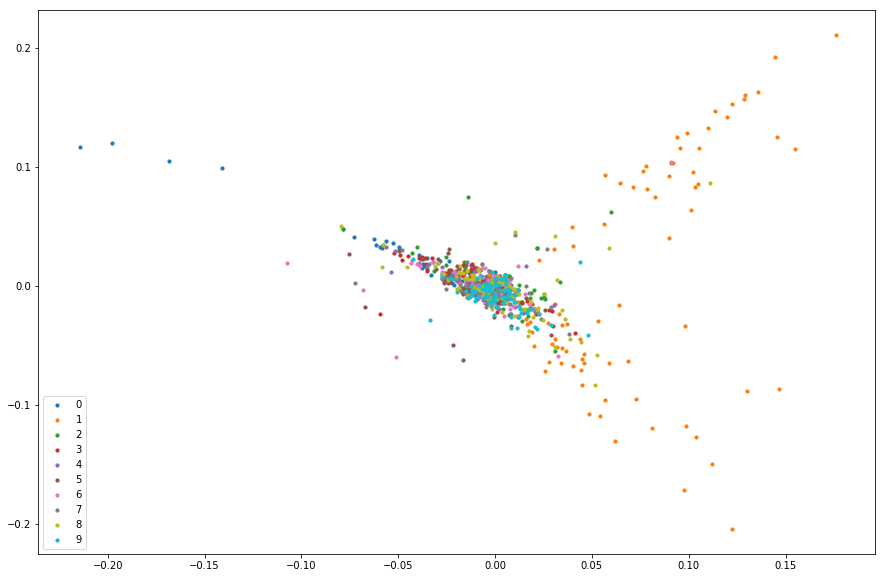

In [5]:
args = {'edge_method': 'k_nearest', 'criteria': 5, 
        'weight_method': 'simple', 't_heatmap':1e20,
        'norm': 'l2'}

l_eig.plot_laplacian_eigenmaps(np.array(mnist_data), range(10), [1,2], args, xLim=None, yLim=None)

Text(0.5,1,'Application of PCA, projection of MNSIT on the 2 fist directions')

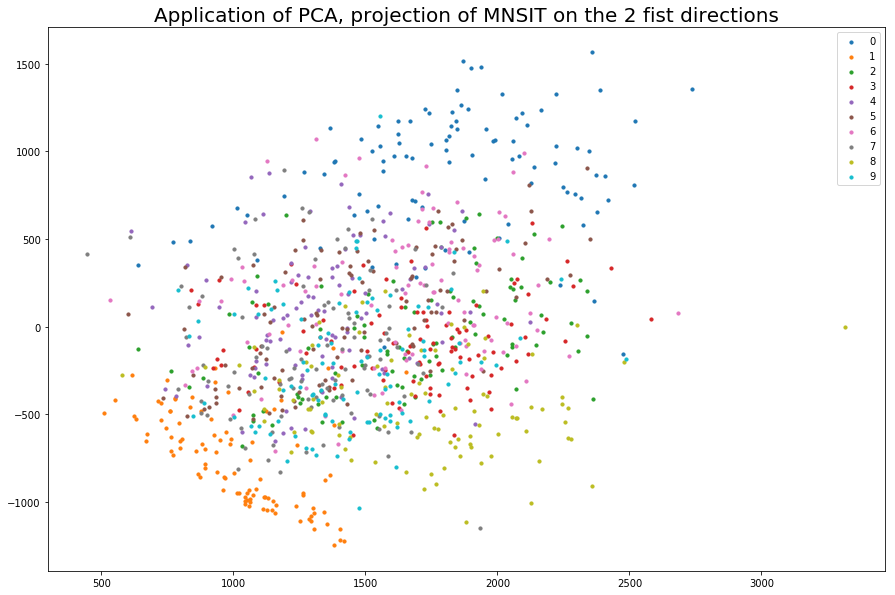

In [68]:
U, diag, V = np.linalg.svd(np.array(mnist_data), full_matrices=False)
pca_to_plot = np.dot(np.array(mnist_data), V[[0,1],:].T)
digits = range(10)

plt.figure(figsize = (15,10))
for i in digits:
    plt.scatter(pca_to_plot[(100*i):(100*(i+1)),0], 
                pca_to_plot[(100*i):(100*(i+1)),1], s=10, label=str(i))
plt.legend()
plt.title('Application of PCA, projection of MNSIT on the 2 fist directions', fontsize=20)

# Laplacian Maps with preprocessing trick
## MNIST first projected on main PCA directions and then calling Laplacian method

For clarity, we kept the best results : when projecting on the 10 first directions. One can notice the impressive improvement of the results.

In [7]:
pca_mnist = np.dot(np.array(mnist_data), V[:10,:].T)

#### Mean distance between data points representing the same digit (shows that e-thresholding edge creation technique is not relevant). Discrepancies might not seem large, but as average is conservative measure, these discrepancies are actually non negligeable when it comes to choose $\epsilon$

In [80]:
data = mnist_data
mean_dist = {}
for i in range(10):
    dists = []
    for j in range(100):
        dists.append(np.mean(np.sum(np.power((mnist_data-mnist_data[100*i+j]), 2), axis=1)))
    mean_dist[i] = sum(dists)/100
mean_dist

{0: 19468.9238,
 1: 14438.361020000004,
 2: 18809.637360000004,
 3: 18804.79118,
 4: 17538.768860000007,
 5: 17920.58006,
 6: 17810.92842,
 7: 16952.302259999993,
 8: 18659.859119999997,
 9: 17422.647239999998}

## First impressive results

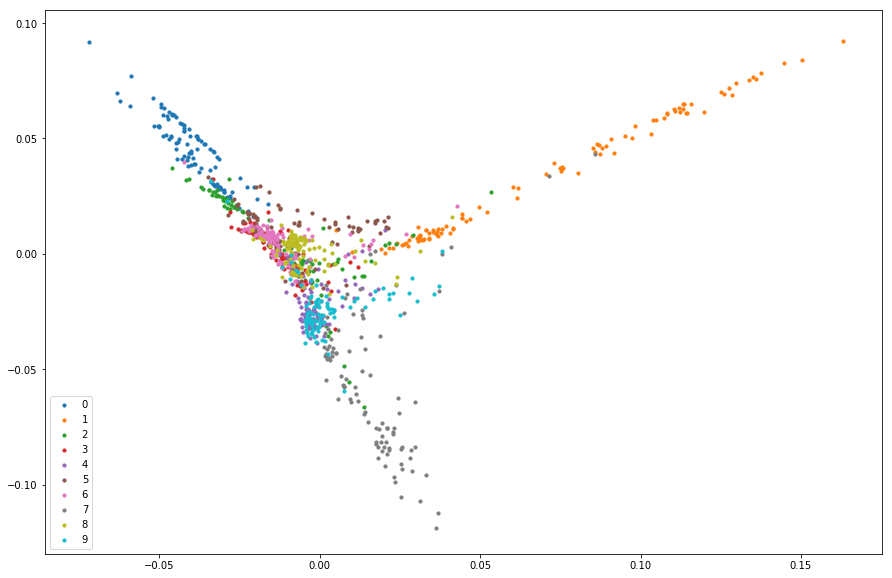

In [26]:
args = {'edge_method': 'k_nearest', 'criteria': 5, 
        'weight_method': 'simple', 't_heatmap':1e20,
        'norm': 'l2'}

l_eig.plot_laplacian_eigenmaps(pca_mnist, range(10), [1,2], args, xLim=None, yLim=None)

## Influence of $k$

For simple weights, the best $k$ we found is 5.

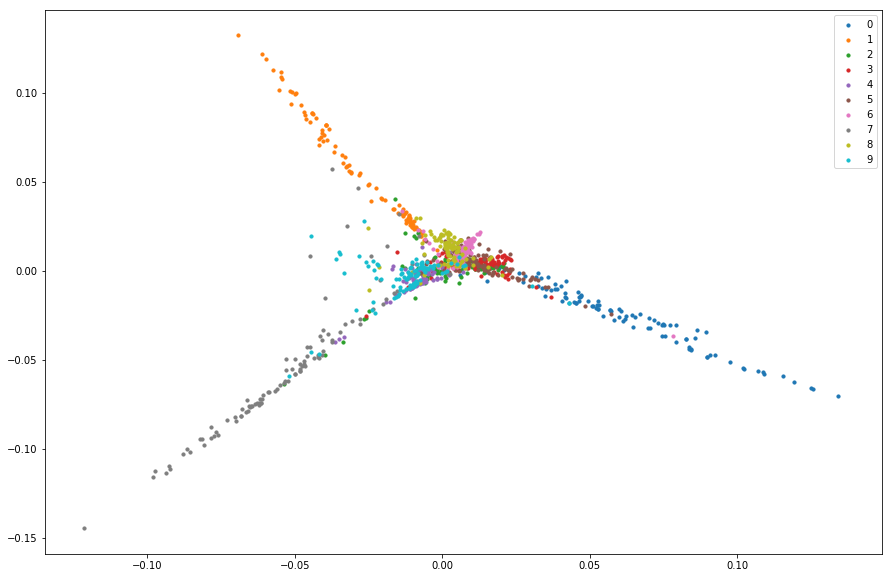

In [54]:
args = {'edge_method': 'k_nearest', 'criteria': 3, 
        'weight_method': 'simple', 't_heatmap':1e20,
        'norm': 'l2'}

l_eig.plot_laplacian_eigenmaps(pca_mnist, range(10), [1,2], args, xLim=None, yLim=None)

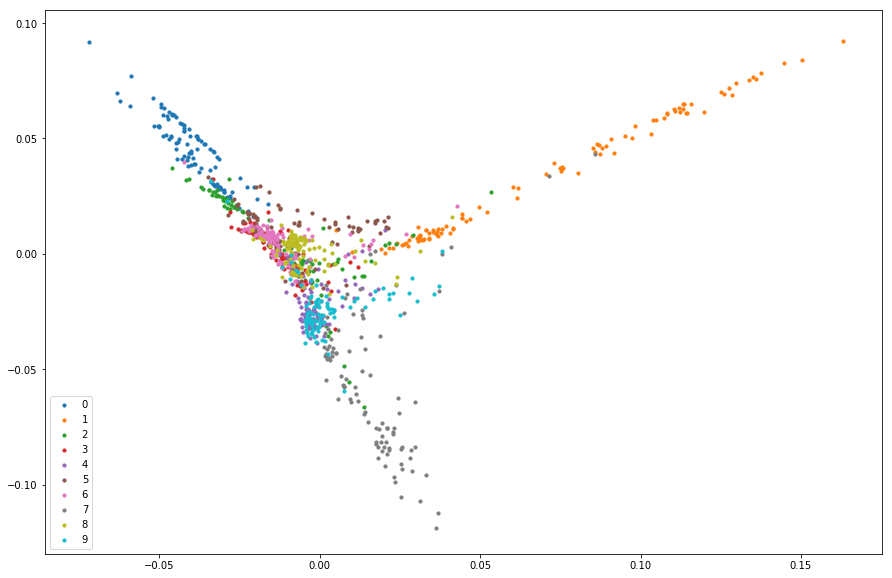

In [51]:
args = {'edge_method': 'k_nearest', 'criteria': 5, 
        'weight_method': 'simple', 't_heatmap':1e20,
        'norm': 'l2'}

l_eig.plot_laplacian_eigenmaps(pca_mnist, range(10), [1,2], args, xLim=None, yLim=None)

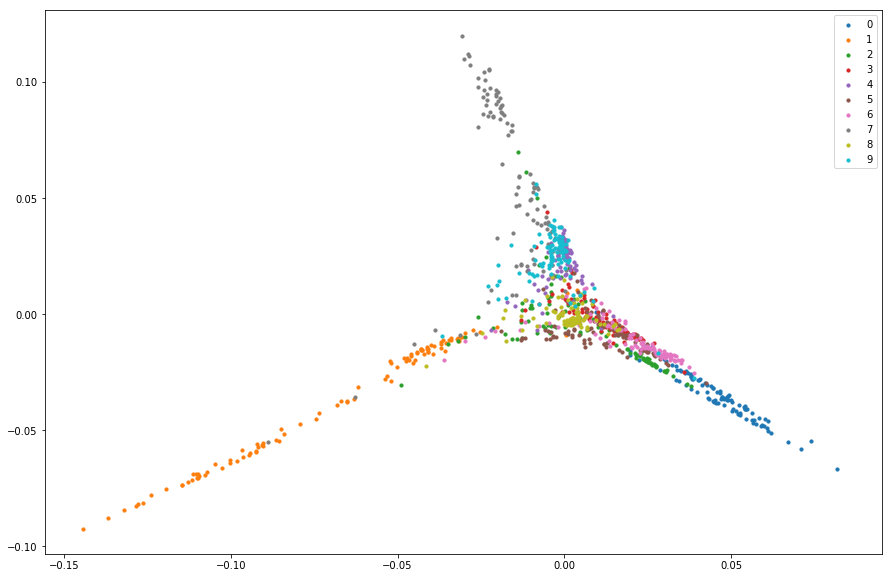

In [52]:
args = {'edge_method': 'k_nearest', 'criteria': 10, 
        'weight_method': 'simple', 't_heatmap':1e20,
        'norm': 'l2'}

l_eig.plot_laplacian_eigenmaps(pca_mnist, range(10), [1,2], args, xLim=None, yLim=None)

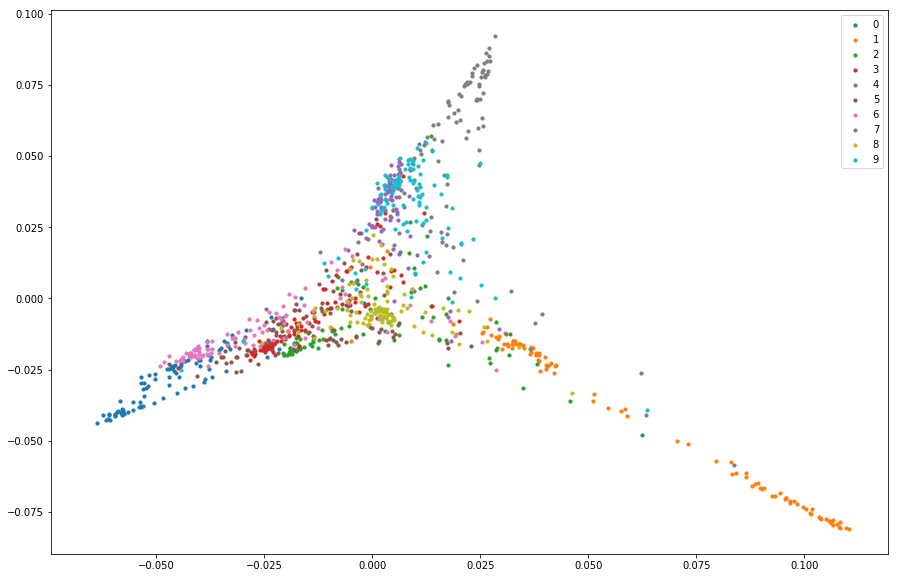

In [53]:
args = {'edge_method': 'k_nearest', 'criteria': 30, 
        'weight_method': 'simple', 't_heatmap':1e20,
        'norm': 'l2'}

l_eig.plot_laplacian_eigenmaps(pca_mnist, range(10), [1,2], args, xLim=None, yLim=None)

## Influence of the weighting function

For Heatmap, results are very similar to the case with simple weights (maybe slightly better with better representations for the red digit). However, because of the exponential, computations are not numerically stable for too small 't_heatmap'

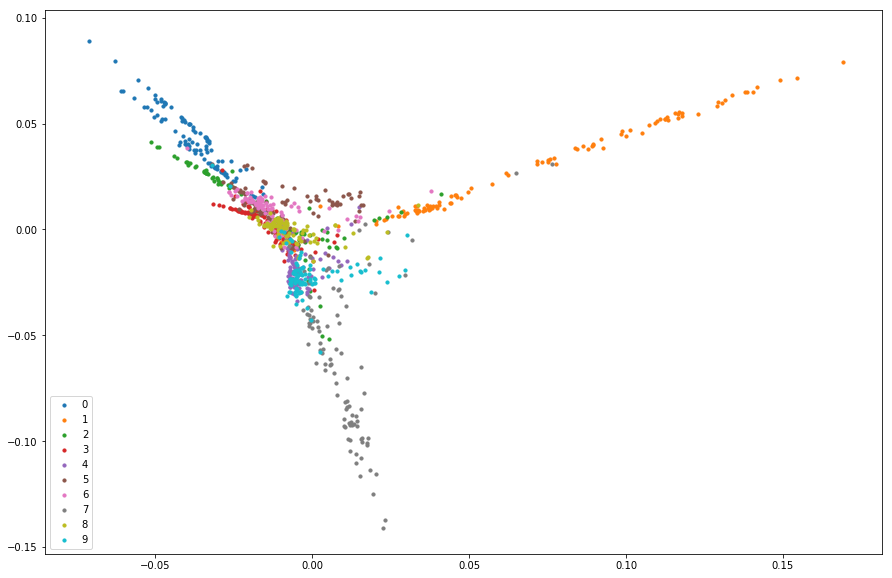

In [27]:
args = {'edge_method': 'k_nearest', 'criteria': 5, 
        'weight_method': 'heatmap', 't_heatmap':1e6,
        'norm': 'l2'}

l_eig.plot_laplacian_eigenmaps(pca_mnist, range(10), [1,2], args, xLim=None, yLim=None)

For the log inverse we introduced (see report section III), it's the same. The weighting procedure doesn't seem to really influence the solution of the optimization..

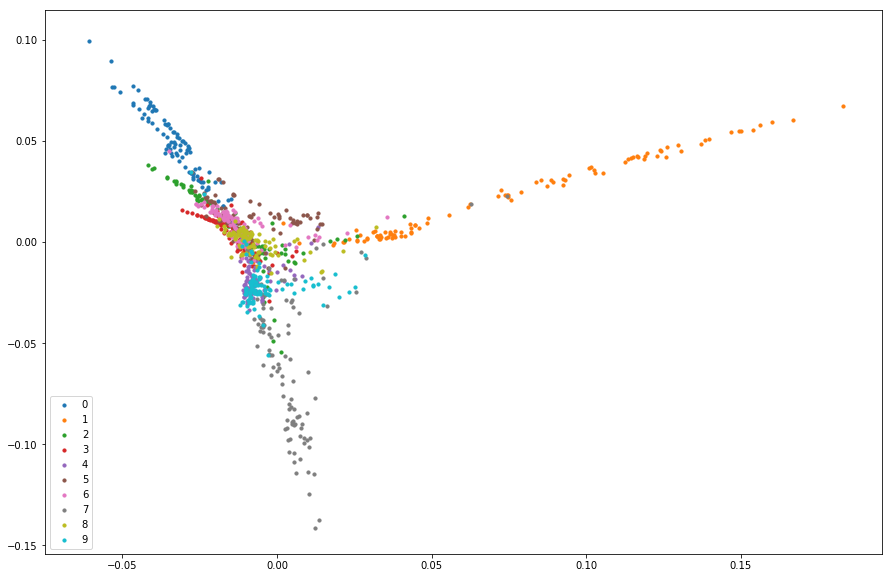

In [28]:
args = {'edge_method': 'k_nearest', 'criteria': 5, 
        'weight_method': 'loginverse', 't_heatmap':1e20,
        'norm': 'l2'}

l_eig.plot_laplacian_eigenmaps(pca_mnist, range(10), [1,2], args, xLim=None, yLim=None)

## l2 versus l1

l2 performs slightly better than l1. Indeed, although they are very similar for most classes, l1 distinguishes far less well 2 of them : the digits '5' and '2'.

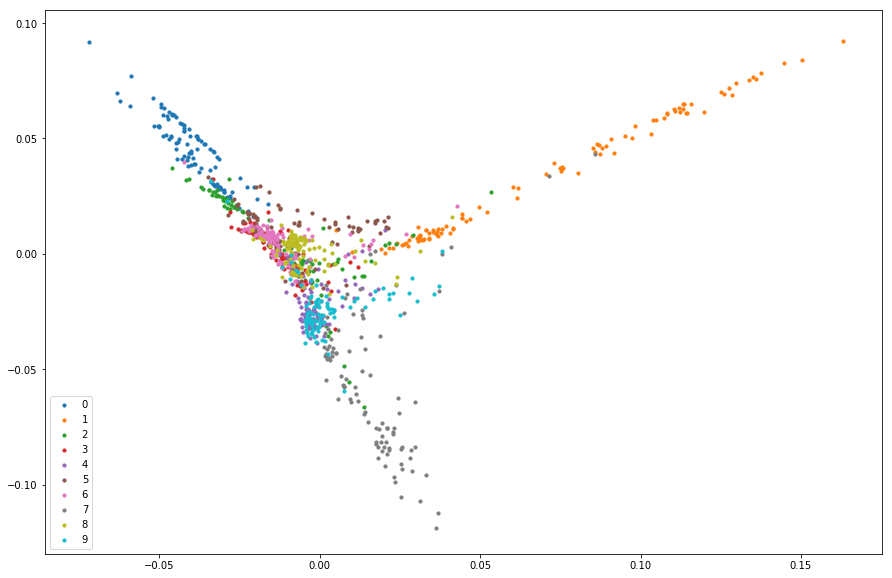

In [30]:
# l2
args = {'edge_method': 'k_nearest', 'criteria': 5, 
        'weight_method': 'simple', 't_heatmap':1e20,
        'norm': 'l2'}

l_eig.plot_laplacian_eigenmaps(pca_mnist, range(10), [1,2], args, xLim=None, yLim=None)

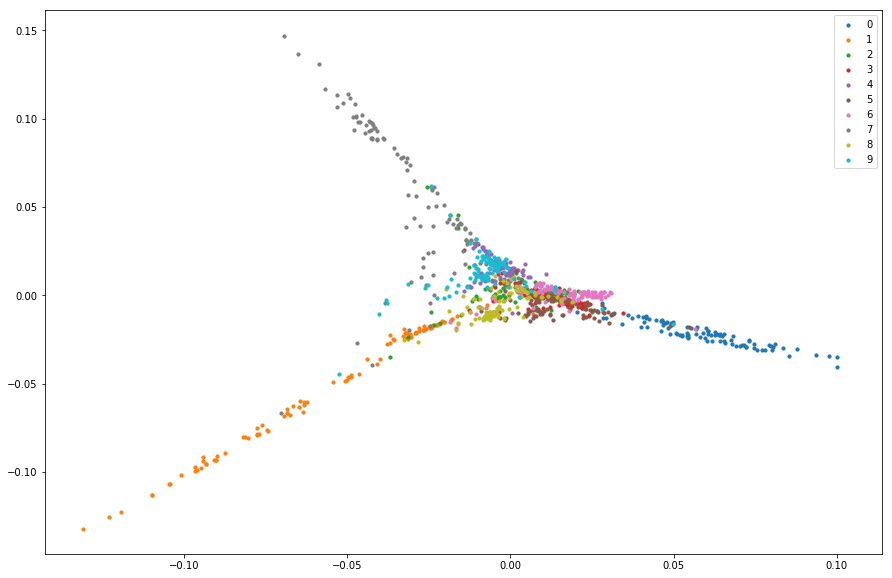

In [31]:
# l1
args = {'edge_method': 'k_nearest', 'criteria': 5, 
        'weight_method': 'simple', 't_heatmap':1e20,
        'norm': 'l1'}

l_eig.plot_laplacian_eigenmaps(pca_mnist, range(10), [1,2], args, xLim=None, yLim=None)

# Best 3D visualization

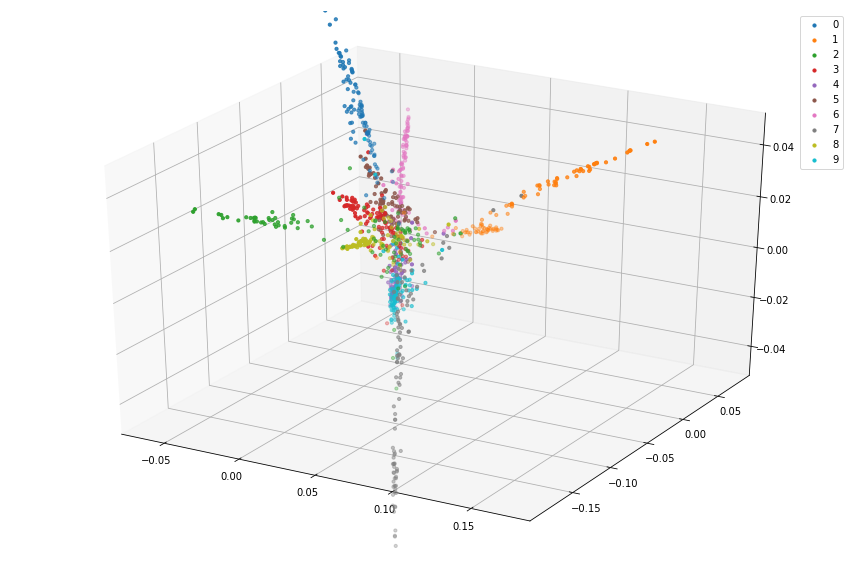

In [42]:
args = {'edge_method': 'k_nearest', 'criteria': 10, 
        'weight_method': 'loginverse', 't_heatmap':1e6,
        'norm': 'l2'}

l_eig.plot_laplacian_eigenmaps(pca_mnist, range(10), [1,3,2], args, plot_dim='3d', 
                               xLim=(-.05,.05), yLim=(-.05,.05), zLim=None)

Text(0.5,0.92,'Application of PCA, projection of MNSIT on the 3 fist directions')

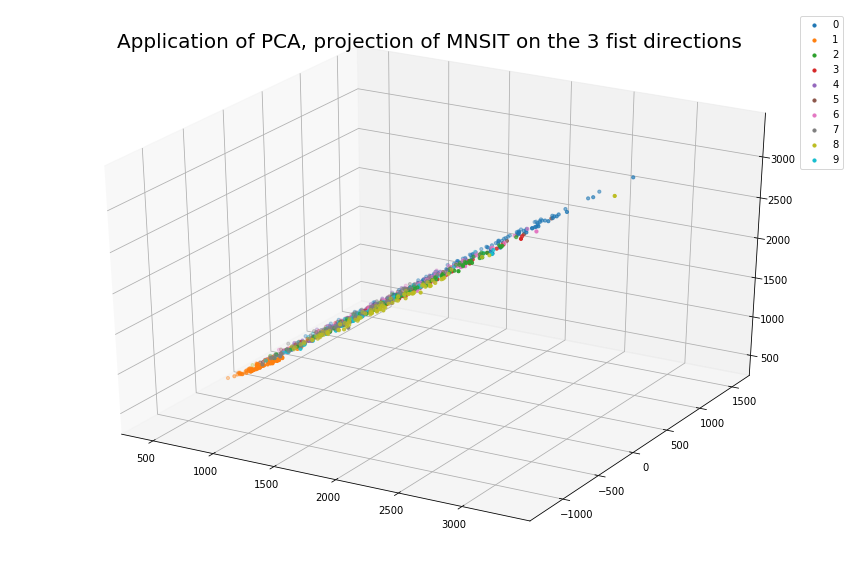

In [76]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')
for i in digits:
    ax.scatter(pca_to_plot[(100*i):(100*(i+1)),0], pca_to_plot[(100*i):(100*(i+1)),1],
               pca_to_plot[(100*i):(100*(i+1)),0], s=10, label=str(i))
plt.legend()
plt.title('Application of PCA, projection of MNSIT on the 3 fist directions', fontsize=20)

# Energy conservation for PCA (here in 3D)

In [69]:
np.sum(np.power(diag[:3],2))/np.sum(np.power(diag[:],2))

0.52541779612401962